### 问题描述

有 <i>n</i> 个底面为长方形的货柜需要租用库房存放，且每个货柜必须放地面上，所有货柜底面宽度都等于库房宽度。第 <i>i</i> 个货柜占用库房面积大小只需用底面长度 <i>L<sub>i</sub></i> 表示，<i>i = 0, 1, ..., n</i>。设库房总长度为 <i>D</i>。如果要求放入库房货柜个数最多？那么应该选用哪种算法设计技术？

### 贪心算法
贪心算法（Greedy Alogorithm）又叫登山算法，它的根本思想是逐步到达山顶，即逐步获得最优解，是解决最优化问题时的一种简单但是适用范围有限的策略。
贪心算法没有固定的框架，算法设计的关键是贪婪策略的选择。贪心策略要无后向性，也就是说某状态以后的过程不会影响以前的状态，至于当前状态有关。
贪心算法是对某些求解最优解问题的最简单、最迅速的技术。某些问题的最优解可以通过一系列的最优的选择即贪心选择来达到。但局部最优并不总能获得整体最优解，但通常能获得近似最优解。
在每一步贪心选择中，只考虑当前对自己最有利的选择，而不去考虑在后面看来这种选择是否合理。

#### 找出全局最优解的要求
一个问题能否使用贪心算法解决问题，取决于以下两点：
* 最优子结构（optimal subproblem structure,和动态规划中的是一个概念）
* 最优贪心选择属性（optimal greedy choice property）

#### 贪婪策略
贪心算法的原理是通过局部最优来达到全局最优，采用的是逐步构造最优解的方法。
要选出最优解不是一件容易的事，要证明局部最优为全局最优，要进行数学证明，否则就不能说明为全局最优。

### 贪心策略的选择
运用贪心法，选择贪心策略为优先放入长度最短的货柜。


### 伪码表示
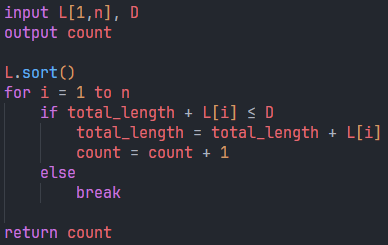

In [3]:
# 伪码实现
def max_containers(L, D):
    L.sort()
    total_length = 0
    count = 0
    for length in L:
        if total_length + length <= D:
            total_length += length
            count += 1
        else:
            break
    return count

L = [2, 3, 5, 1, 4]
D = 10
print("最大数量：", max_containers(L, D))

最大数量： 4


### 算法正确性证明
要证明该贪心算法的正确性，即证明贪心策略的正确性，即按照货柜长度从小到大排序并依次放入的方法能够得到放入库房货柜数量的最大值。

#### 交换论证
* 假设最优解中第一个货柜的长度不是最小的，而是某个较大的货柜。
* 将这个较大的货柜与贪心策略选择的第一个最小货柜交换位置。
* 交换后，新的解仍然是有效的，因为较小的货柜更容易放入库房。
* 继续这个过程，即可可以逐步将最优解转换为贪心策略的解，而不减少放入库房的货柜数量。

则可证明：贪心策略得到的解与最优解是等价的。

### 复杂度分析
* 最坏的情况是输入长度序列为递减，最优排序算法的时间复杂度是O(nlogn)

### 问题描述
设有一条边远山区的道路AB，沿着道路AB分布着所房子。这些房子到A的距离分别是 <i>d<sub>1</sub></i>, <i>d<sub>2</sub></i>, …, <i>d<sub>n</sub></i> (<i>d<sub>1</sub></i> < <i>d<sub>2</sub></i> < … < <i>d<sub>n</sub></i>). 为了给所有房子的用户提供移动电话服务需要在这条道路上设置一些基站，为了保证通信质量，每所房子应该位于距离某个基站的4km范围之内，设计一个算法找到基站的位置，并且使得基站总数达到最少？

### 贪心策略选择
* 从最左边的房子开始处理
* 对于当前房子，在其右侧4km处放置基站
* 该基站可以覆盖左侧4km和右侧4km范围内的所有房子
* 跳过所有被当前基站覆盖的房子
* 重复此过程直到所有房子都被覆盖

### 伪码表示
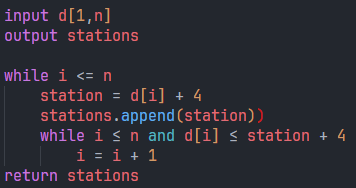

In [6]:
# 伪码实现
def place_stations(houses):
    
    n = len(houses)
    stations = [] # 存储基站位置

    i = 0
    while i < n:
        # 在当前房子右侧4km处放置基站
        station = houses[i] + 4
        stations.append(station)
        # 跳过所有被当前基站覆盖的房子
        while i < n and houses[i] <= station + 4:
            i += 1
    return stations

houses = [1, 3, 7, 12, 15, 20]
stations = place_stations(houses)
print("基站位置：", stations)
print("基站数量：", len(stations))

基站位置： [5, 16]
基站数量： 2


### 算法正确性证明

1. 设贪心算法得到解为G，基站位置集合为{s₁, s₂, ..., sₖ} 假设存在最优解O，基站数量少于k个，解O第一个基站位置为t₁
* 若t₁ > s₁：t₁无法覆盖d₁(因为s₁是能覆盖d₁的最右位置)
* 若t₁ < s₁：将t₁右移至s₁位置不会减少覆盖范围
2. 归纳证明，假设前i-1个基站位置相同，对第i个基站：
* G中s<sub>i</sub>放在首个未覆盖房子右侧4km处
* O中若t<sub>i</sub>位置不同，用相同论证可证明t<sub>i</sub>可移动到s<sub>i</sub>位置
3. 得出矛盾，通过逐步调整，O可转换为G，但O的基站数量不可能少于G，与假设矛盾

### 算法复杂度分析
* 时间复杂度为O(n)，最坏情况下，每个房子间距8km，外层循环需要遍历每个房子，时间复杂度仍是O(n)